# Data Science and Visualization (RUC F2024)

## Miniproject Report

## Project Title:  Predicting Heart Attack Occurence: An Analysis of Clinical Data

## Group Members:

* Mustafa Berkan Yikilmaz, Computer Science, 2024, stud-mby@ruc.dk
* Kaoutar Mesbahi, Bioprocess Science, 2024, stud-mesbahi@ruc.dk
* Berkin Kagan Ates, Computer Science, 2024, stud-berkin@ruc.dk

## Abstract

* Our project aims to predict the occurrence of heart attack using a dataset collected from Zheen Hospital in Erbil, Iraq that includes demographic information namely age, and gender; physiological measurements such as heart rate, diastolic and systolic blood pressure; and biochemical parameters that include blood sugar, ck-mb and troponin levels.
https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset 
...





## 0. Setup and Data

Import the modules needed for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import statsmodels.formula.api as smf

from IPython import display

from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz

from mpl_toolkits.mplot3d import Axes3D

### Data description:
* We found this data in a website named Kaggle. We reckon that this data might be proper for predicting to future data and execute all topics we covered during the classes.
* The heart attack datasets were gathered from January to May 2019 at the Zheen Hospital in Erbil, Iraq. 
* This dataset contains the following attributes: blood sugar, ck-mb, age, gender, heart rate, systolic and diastolic blood pressure, and troponin with positive or negative output. Depending on the information supplied, the medical dataset categorises heart attacks as positive or negative. The data's gender column is normalised, with 1 representing male and 0 representing female.



## 1. Loading the Data

[Below you should load the data, display a part of the data, show the shape (number of rows and that of columns) of the data, and show the statistics of the data.]

In [2]:
#loading the data
data = pd.read_csv('Medicaldataset.csv')
# Displaying the first part of our data
data.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


Age: Age of the patient (integer).

Gender: Gender of the patient, encoded as integers (likely 1 for male and 0 for female).

Heart rate: Heart rate of the patient (integer).

Systolic blood pressure: Top number in a blood pressure reading (integer).

Diastolic blood pressure: Bottom number in a blood pressure reading (integer).

Blood sugar: Blood sugar levels (float).

CK-MB: Creatine kinase MB, an enzyme found in the heart muscle (float).

Troponin: A group of proteins that help regulate the contraction of the heart muscle (float).

Result: The outcome for the patient ('positive' or 'negative' for heart issues).


In [3]:
# Displaying the last part of our data
data.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [4]:
# Displaying the shape of our data: (# of rows, and # of columns)
data.shape

(1319, 9)

In [5]:
# Displaying all column's info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [6]:
# Displaying the statistics of our data with both numeric and object type data

data.describe(include='all')

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,NaN
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,NaN
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,NaN
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,NaN
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,NaN
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,NaN


As it can be seen above, patients' ages range between 14 to 103, with the mean of around 56.193328.

## 2. Data Preprocessing

There is no missing value in the data. 

In [11]:
# To count if there is any missing numerical value 
data.isnull().any()

Age                         False
Gender                      False
Heart rate                  False
Systolic blood pressure     False
Diastolic blood pressure    False
Blood sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool

In [12]:
# To count if there is any missing object value 
data.isna().any()

Age                         False
Gender                      False
Heart rate                  False
Systolic blood pressure     False
Diastolic blood pressure    False
Blood sugar                 False
CK-MB                       False
Troponin                    False
Result                      False
dtype: bool

However, there are 3 patients whose heart rate is calculated as 1111, which doesnt make sense with the rest of the data. Therefore, we remove them from our dataset.

In [9]:
data['Heart rate'].nlargest(10)

63      1111
717     1111
1069    1111
21       135
682      135
1012     135
346      134
842      134
1213     134
457      132
Name: Heart rate, dtype: int64

In [17]:

indices_to_drop = data[data['Heart rate'] == 1111].index

data = data.drop(indices_to_drop)
data.reset_index(drop=True, inplace=True)

In [18]:
# For simplicity we give them shorter names
data.rename(columns={'Diastolic blood pressure': 'Diastolic'}, inplace=True)
data.rename(columns={'Systolic blood pressure': 'Systolic'}, inplace=True)

In [19]:
data

,Age,Gender,Heart rate,Systolic,Diastolic,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,negative
1312,66,1,84,125,55,149.0,1.33,0.172,positive
1313,45,1,85,168,104,96.0,1.24,4.250,positive
1314,54,1,58,117,68,443.0,5.80,0.359,positive


## 3. Exploratory Data Analysis


Question: In our labelling data how many cases have positive results and negative ones?


Text(0, 0.5, '# of cases')

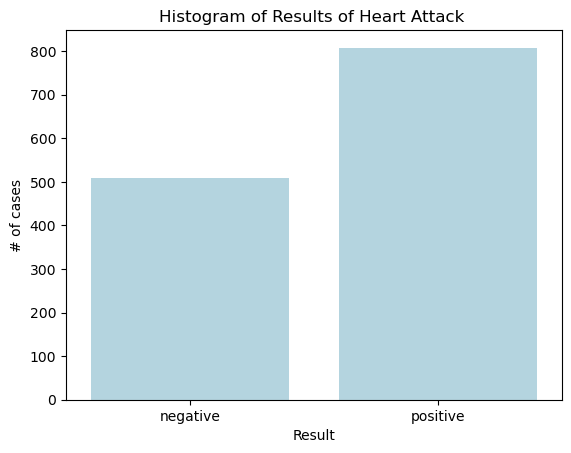

In [20]:
#1. To see how many cases had a heart attack and how many didn't
sns.countplot(x="Result",data=data, color='lightblue')
plt.title('Histogram of Results of Heart Attack ')

plt.xlabel('Result')
plt.ylabel('# of cases')


Question: How are positive results distributed among different genders?

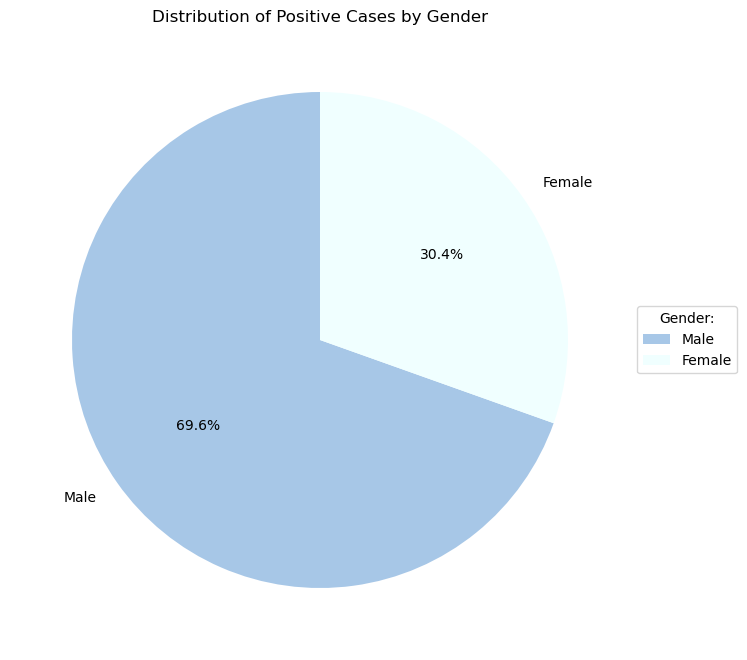

In [21]:
# Filter the data for positive cases
positive_cases = data[data['Result'] == 'positive']

# Count the number of male and female cases among positive cases
male_positive_cases = positive_cases[positive_cases['Gender'] == 1]
female_positive_cases = positive_cases[positive_cases['Gender'] == 0]
# Count the number of positive cases for each gender
male_count = len(male_positive_cases)
female_count = len(female_positive_cases)

# Plotting the pie chart
plt.figure(figsize=(8, 12))
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['#A7C7E7', '#F0FFFF'])
plt.title('Distribution of Positive Cases by Gender')
plt.legend(title= "Gender:", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

Question: What age group is most susceptible to experiencing a heart attack?

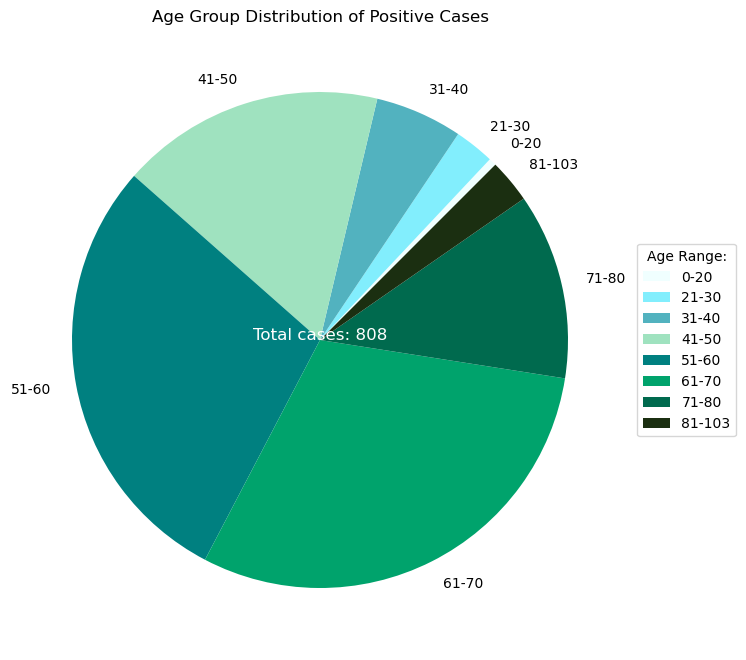

In [22]:
# Color choice
custom_colors = ['#F0FFFF','#82EEFD', '#52B2BF',  '#9FE2BF','#008080', '#00A36C','#006A4E' ,'#1B2F11']

# We filtered the data to include only rows where the result is 'positive'
positive_cases = data[data['Result'] == 'positive']

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 103]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-103']
age_groups = pd.cut(positive_cases['Age'], bins=age_bins, labels=age_labels)

# Count the occurrences of each age group
age_group_counts = age_groups.value_counts()

# Sort the age groups
age_group_counts_sorted = age_group_counts.sort_index()

# Plotting a pie chart
plt.figure(figsize=(8, 12))
plt.pie(age_group_counts_sorted, labels=age_group_counts_sorted.index,startangle=45, labeldistance=1.1, colors=custom_colors)
plt.title('Age Group Distribution of Positive Cases')

# Add the total number of cases inside the pie chart
total_cases = len(positive_cases)
plt.text(0, 0, f'Total cases: {total_cases}', fontsize=12,color='white', ha='center')

# Making the legend
plt.legend(title= "Age Range:", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

Question: How do various medical parameters differ between people who have experienced heart attacks and those who have not?

In [23]:
data.groupby('Result').mean()

,Age,Gender,Heart rate,Systolic,Diastolic,Blood sugar,CK-MB,Troponin
Result,,,,,,,,
negative,52.139764,0.604331,75.852362,127.830709,72.395669,149.891142,2.555138,0.027026
positive,58.768564,0.695545,76.064356,126.704208,72.105198,144.724010,23.317994,0.570926


=> When we group patients by their results, we see that their age systolc and diastolic blood pressures as well as blood sugar levels are somehow similar. However, CK-MB and Troponin levels of positive cases are very high compared to negatives.

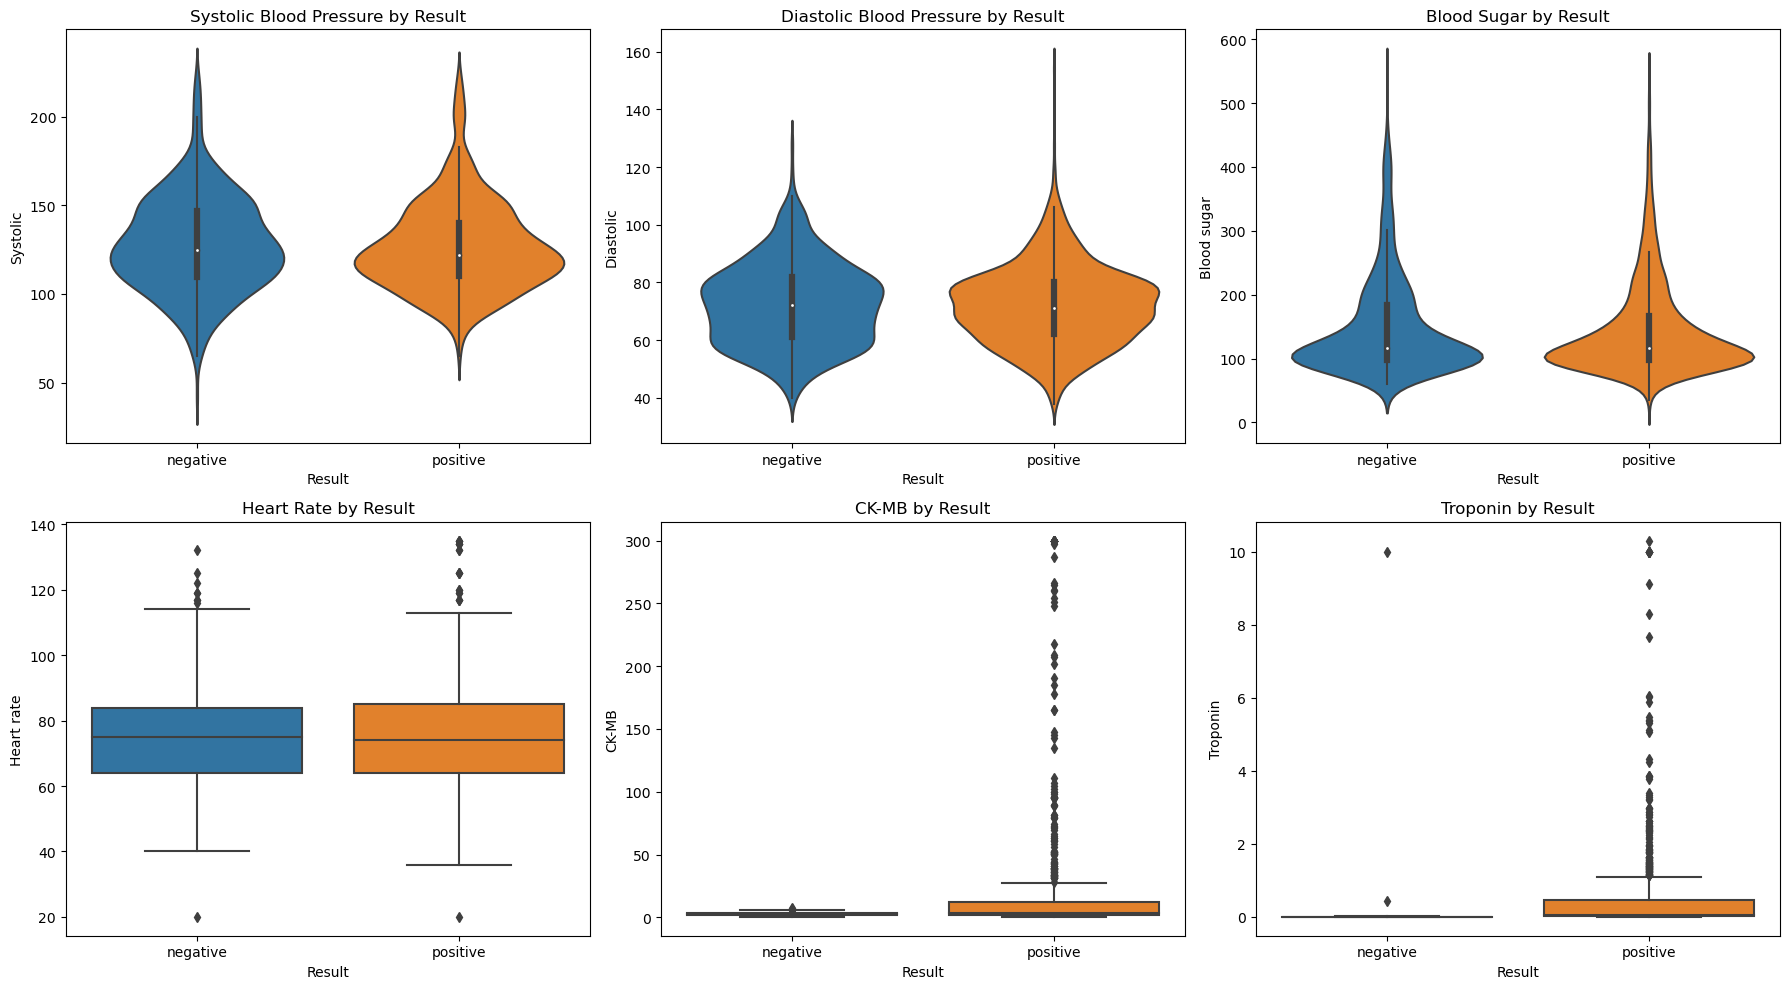

In [24]:
plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.violinplot(x = 'Result', y = 'Systolic', data = data)
plt.title('Systolic Blood Pressure by Result')

plt.subplot(2, 3, 2)
sns.violinplot(x = 'Result', y = 'Diastolic', data = data)
plt.title('Diastolic Blood Pressure by Result')

plt.subplot(2, 3, 4)
sns.boxplot(x = 'Result', y = 'Heart rate', data = data)
plt.title('Heart Rate by Result')

plt.subplot(2, 3, 3)
sns.violinplot(x = 'Result', y = 'Blood sugar', data = data)
plt.title('Blood Sugar by Result')

plt.subplot(2, 3, 5)
sns.boxplot(x = 'Result', y = 'CK-MB', data = data)
plt.title('CK-MB by Result')

plt.subplot(2, 3, 6)
sns.boxplot(x = 'Result', y = 'Troponin', data = data)
plt.title('Troponin by Result')

plt.tight_layout()
plt.show()

Question: Is there a correlation between CK-MB, Troponin with Heart Attack Result?

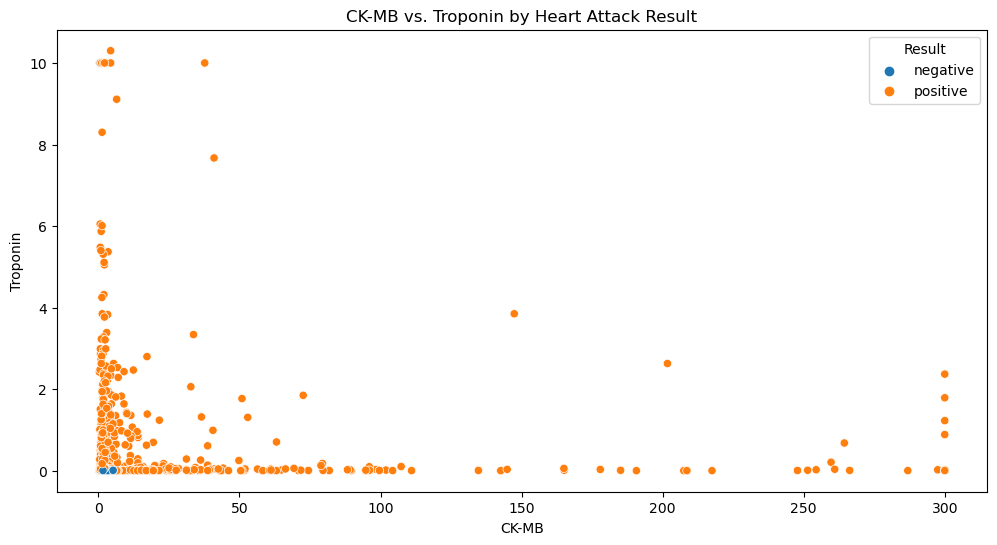

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CK-MB', y='Troponin', hue='Result', data=data)
plt.title('CK-MB vs. Troponin by Heart Attack Result')
plt.xlabel('CK-MB')
plt.ylabel('Troponin')
plt.legend(title='Result')
plt.show()

Question: How is the distribution of blood pressure for both cases?

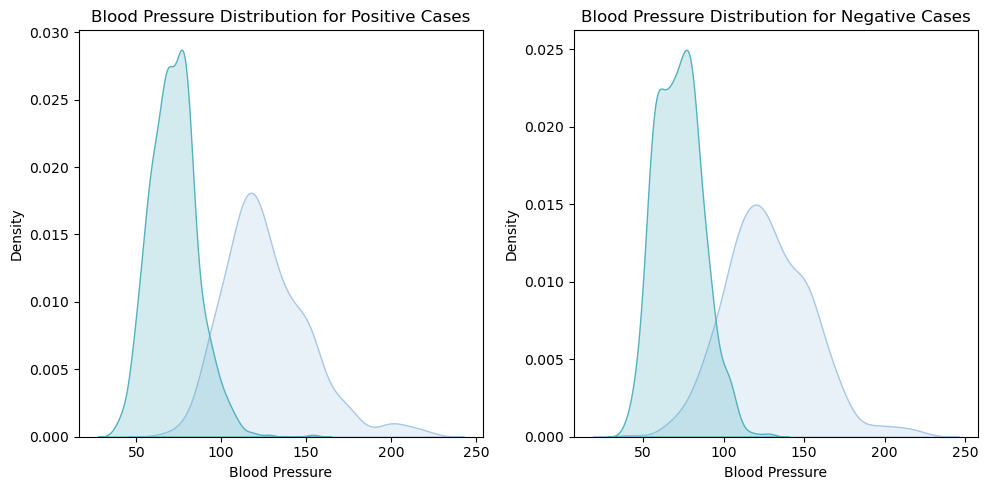

In [88]:
# Filter the data for positive cases & for negative cases

positive_cases = data[data['Result'] == 'positive']
negative_cases = data[data['Result'] == 'negative']

# Set how we want the axes to look like
fix,axes = plt.subplots(1,2, figsize=(10,5))

sns.kdeplot(positive_cases['Systolic'], fill=True, color='#A7C7E7', label='Systolic Blood Pressure', ax=axes[0])
sns.kdeplot(positive_cases['Diastolic'], fill=True, color='#52B2BF', label='Diastolic Blood Pressure', ax=axes[0])
axes[0].set_title('Blood Pressure Distribution for Positive Cases')
axes[0].set_xlabel('Blood Pressure')

sns.kdeplot(negative_cases['Systolic'], fill=True, color='#A7C7E7', label='Systolic  Blood Pressure', ax=axes[1])
sns.kdeplot(negative_cases['Diastolic'], fill=True, color='#52B2BF', label='Diastolic  Blood Pressure', ax=axes[1])
axes[1].set_title('Blood Pressure Distribution for Negative Cases')
axes[1].set_xlabel('Blood Pressure')

plt.tight_layout()
plt.show()

Question: What is the corrolation between all the features

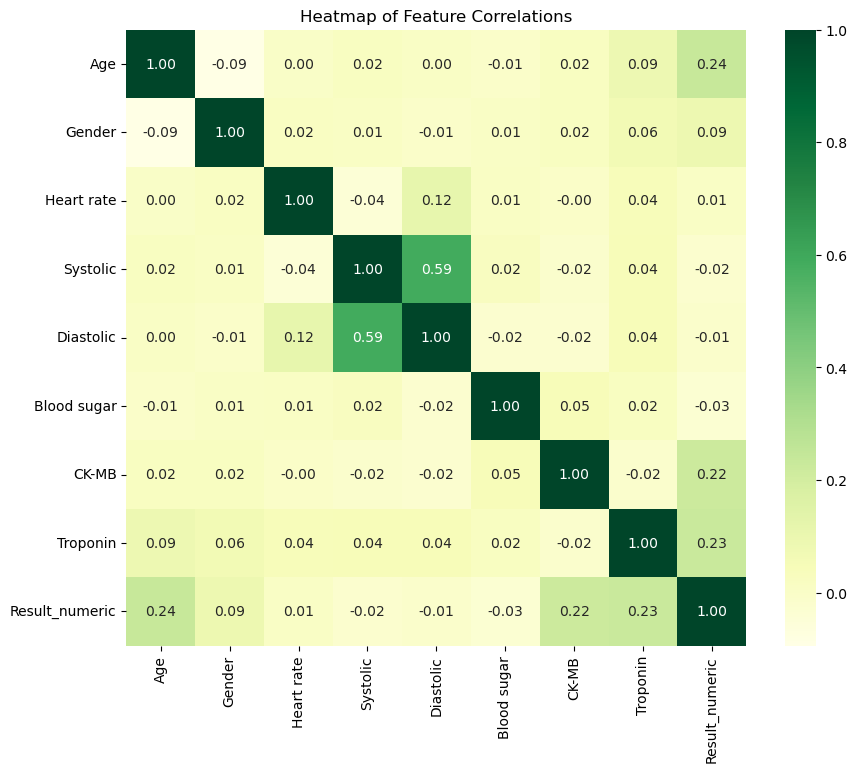

In [99]:
# Convert categorical 'Result' column to numeric:'positive' -> 1 and 'negative' -> 0
data['Result_numeric'] = data['Result'].apply(lambda x: 1 if x == 'positive' else 0)

# Compute the correlation matrix for all numeric columns
corr = data.select_dtypes(include=[np.number]).corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGn')
plt.title('Heatmap of Feature Correlations')
plt.show()

## 4. Data Modelling

* Since we can analyse many features in our dataset, we have decided to use different models for different features. For every model a title is allocated.

## 4.1. Regression



### 4.1.1 Feature Selection for Regression
* Firsty, we need to observe and visualize the these feature's data to check which modelling method is convenient for it.

In [27]:
features = data[['Diastolic','Systolic']]
features.values

array([[ 83, 160],
       [ 46,  98],
       [ 77, 160],
       ...,
       [104, 168],
       [ 68, 117],
       [ 79, 157]], dtype=int64)

### 4.1.2 Model Construction and Validation

* We start to construct our model

In [28]:
model = smf.ols('Diastolic ~ Systolic', data=data)
model = model.fit()

model.params

Intercept    32.288499
Systolic      0.314056
dtype: float64

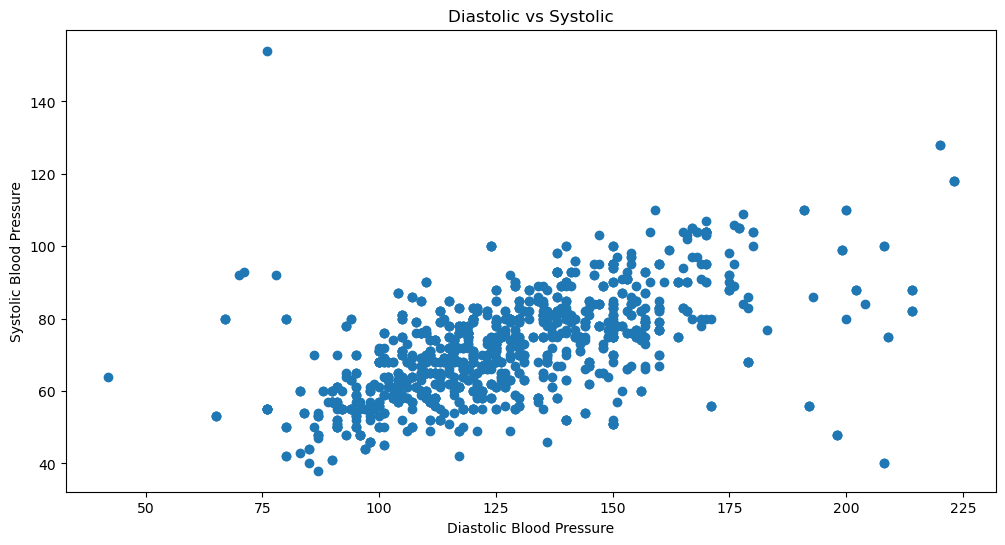

In [29]:
bp_pred = model.predict()

plt.figure(figsize=(12, 6))

plt.plot(data['Systolic'], data['Diastolic'], 'o')

plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.title('Diastolic vs Systolic')

plt.show()

=> As we can see from the graph above, systolic blood pressure values are restricted between the values of approximately 40-140 and diastolic blood pressure values are restricted between the values of approximately 50-225. Additionally, we can see that a linear relation exits between these values.

### 4.1.3 Model Application and Performance Evaluation

#### 4.1.3.1 Simple Linear Regression

1316
1316


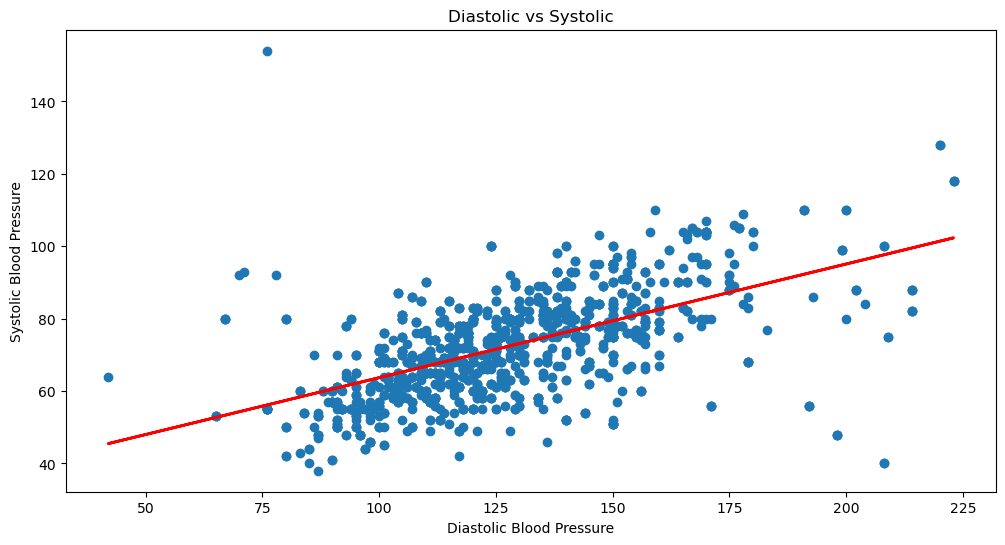

In [30]:
print(len(bp_pred))
print(len(data["Systolic"]))
plt.figure(figsize=(12, 6))

plt.plot(data['Systolic'], data['Diastolic'], 'o')
plt.plot(data["Systolic"], bp_pred, 'r', linewidth=2)


plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.title('Diastolic vs Systolic')

plt.show()

By looking at the correlation between these blood pressures, it is possible to conclude that there is a linear relation between these values. Therefore, we can apply Linear Regression to predict pressure values. By applying linear regression we can predict different kind of blood pressure values.

In [31]:
testX = 150
model.predict({"Systolic": testX})

0    79.396949
dtype: float64

#### 4.1.3.2 Multiple Linear Regressions
We can use two columns for applying regression

In [32]:
multipleReg = smf.ols('Diastolic ~ Systolic + Age', data=data)
multipleReg = multipleReg.fit()

multipleReg.params

Intercept    32.644449
Systolic      0.314120
Age          -0.006477
dtype: float64

In [33]:
multipleReg.predict({"Systolic":150, "Age":30})

0    79.568167
dtype: float64

In [34]:
predResult = multipleReg.predict()
predResult

array([82.49563001, 63.29868746, 82.54096858, ..., 85.12517632,
       69.04675488, 81.63099275])

We can plot a graph using multiple regression.

In [35]:
def plotMulLinearReg(X1, X2, y, intercept, beta1, beta2):
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X1, X2, y, marker='.', color='red')

    xx = np.linspace(X1.min(), X1.max(), 2)
    yy = np.linspace(X2.min(), X2.max(), 2)

    x_surf, y_surf = np.meshgrid(xx, yy)

    z_surf = intercept + x_surf*beta1 + y_surf*beta2

    ax.plot_surface(x_surf, y_surf, z_surf, color='pink', alpha=0.5)

    ax.set_xlabel("Diastolic Blood Pressure")
    ax.set_ylabel("Systolic Blood Pressure")
    ax.set_zlabel("Age")
    plt.title('Systolic Blood Pressure + Age vs Diastolic Blood Pressure')

    plt.show()


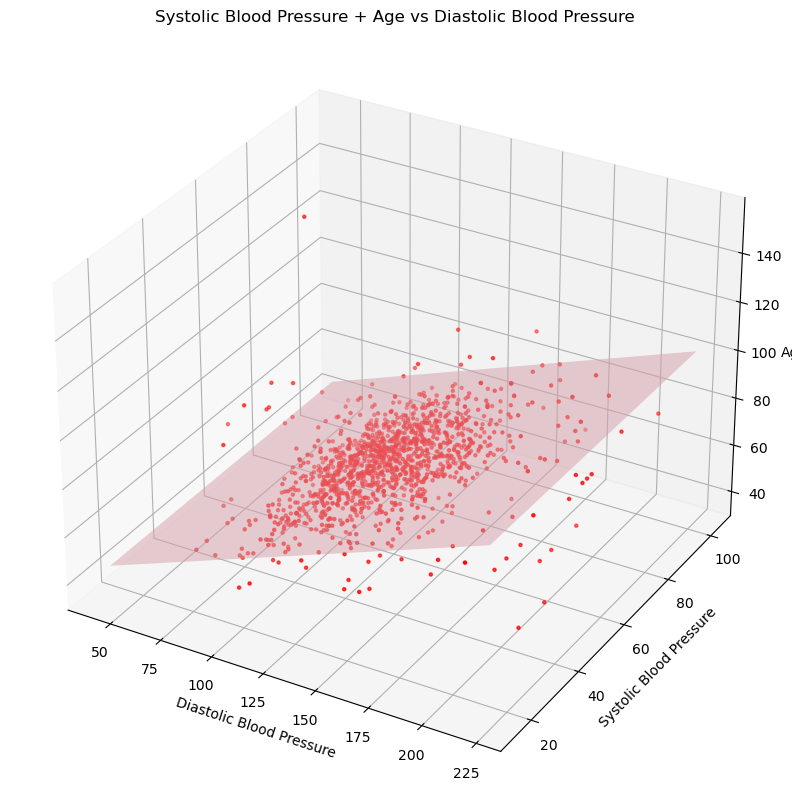

In [36]:
plotMulLinearReg(data.Systolic, data.Age, data.Diastolic, multipleReg.params[0], multipleReg.params[1], multipleReg.params[2])
   

#### 4.1.3.3 Scikit-Learn
We can apply linear regression by also using scikit-learn.

In [37]:
from sklearn.linear_model import LinearRegression

x = data[['Systolic']]
y = data['Diastolic']

linearReg = LinearRegression()
linearReg = linearReg.fit(x, y)

print(f'alpha = {linearReg.intercept_}')
print(f'betas = {linearReg.coef_}')

alpha = 32.28849888586426
betas = [0.31405633]



It can be done more than 2 parameters.

In [38]:

x = data[['Systolic', 'Age']]
y = data['Diastolic']

xTrained, xTest, yTrained, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

modelTriple = LinearRegression()
modelTriple = modelTriple.fit(xTrained, yTrained)

print(f'alpha = {modelTriple.intercept_}')
print(f'betas = {modelTriple.coef_}')

alpha = 33.56919506046872
betas = [3.03760239e-01 1.99293782e-05]


We can make predictions using the model

In [40]:
y_pred = modelTriple.predict(xTest)
y_pred

array([ 80.34916872,  68.50281833,  63.94639481,  57.87136939,
        72.75558126,  81.26013057,  72.45190073,  86.72897078,
        69.11029895,  94.32249845,  67.59121874,  71.53984277,
        79.74174789,  63.33899391,  67.28811617,  79.13448649,
        64.24997569,  70.32543955,  73.05924185,  82.17228818,
        69.11033881,  71.23676013,  73.05882333,  61.21275195,
        69.11023916,  73.05922192,  84.90587125,  70.02148002,
        84.60201136,  77.00794559,  68.19909795,  73.05864397,
        77.61552586,  78.52722509,  62.42787263,  70.62919979,
        66.98365841,  61.81971441,  67.89545729,  75.48952306,
        68.80623977,  79.74142902,  66.07235776,  86.72811381,
        85.20983078,  77.00826446,  79.74150873,  80.34934808,
        94.32217958,  70.02191847,  69.71805858,  72.14804085,
        75.48950313,  88.24767232,  78.22304634,  70.32528012,
        71.54065988,  71.23687971,  71.84418096,  62.4275139 ,
        71.5405403 ,  77.00818475,  72.75526239,  82.17

And also check teh errors in the model.

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))
print('R2:', r2_score(yTest, y_pred))

Mean Absolute Error: 8.174164957024578
Mean Squared Error: 105.225019486795
Root Mean Squared Error: 10.257924716373921
R2: 0.44777128843838887


### 4.1.4 Visualization of our Results for Regression
Now we can visualize all results we got above. This is the graph we got using simple linear regression

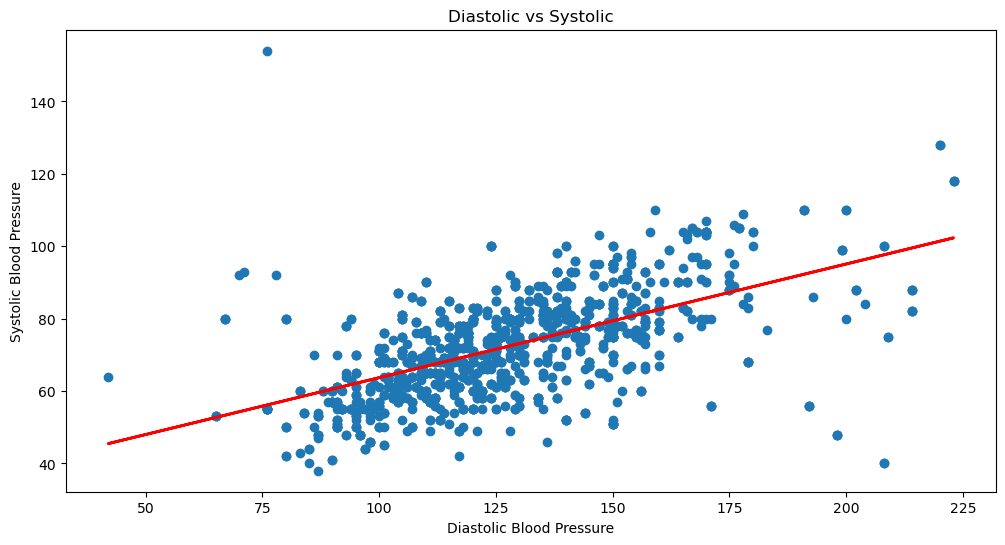

In [42]:
plt.figure(figsize=(12, 6))

plt.plot(data['Systolic'], data['Diastolic'], 'o')
plt.plot(data['Systolic'], bp_pred, 'r', linewidth=2)

plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
plt.title('Diastolic vs Systolic')

plt.show()

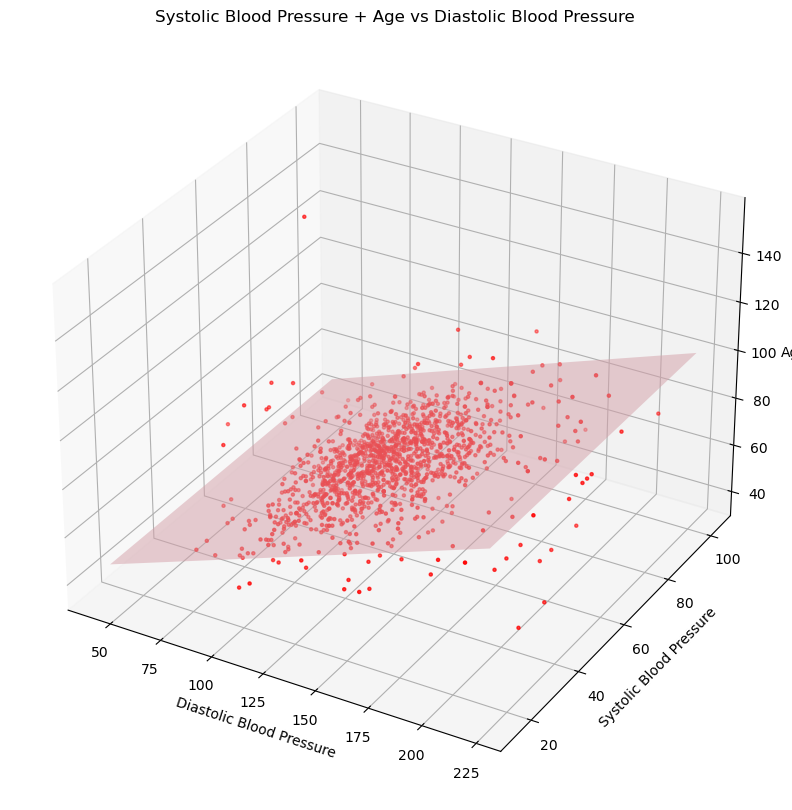

In [43]:
plotMulLinearReg(data.Systolic, data.Age, data.Diastolic, modelTriple.intercept_, modelTriple.coef_[0], modelTriple.coef_[1])

### 4.1.5 Result and Analysis
As we can see, there is an apparent linear correlation between diastolic and systolic blood pressure values. As a result, we can apply linear regression to predict the values with decent results. It is possible to use different kinds of linear regression models, such as simple and multiple, to get the same result. In addition, the visualization can be done using scikit-learn. Regarding the correlation and result, even though the linear relation between Systolic and Diastolic blood pressures remains the same as people get older, they generally have higher blood pressure value

## 4.2 Classification

With the classification models, we will try to classify if a patients' results are positive or negative. Therefore, Result will be our target variable while other columns are our features.

### 4.2.1. Feature Selection

Information about all columns

In [45]:
data.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic', 'Diastolic', 'Blood sugar',
       'CK-MB', 'Troponin', 'Result'],
      dtype='object')

We select our features:

In [44]:
feature_cols = data.columns.drop([ 'Result'])
feature_cols

Index(['Age', 'Gender', 'Heart rate', 'Systolic', 'Diastolic', 'Blood sugar',
       'CK-MB', 'Troponin'],
      dtype='object')

Class lebels:

In [46]:
data.Result.unique()

array(['negative', 'positive'], dtype=object)

We use **X** to represent all data under the feature columns, and **y** the class label column in the data.

In [47]:
# The Features
X = data[feature_cols]

# The Target variable
y = data.Result

### 4.2.2 Model Construction and Validation

Before we start constructing the models, we split our data into train and test data. We decided to use 70% of our data as training data, therefore, the rest (30%) of our data will be the test data to measure accuracy, recall and precision results.

In [48]:
# Splitting the data into: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
y_test.count()

395

Now we can create our models. We will save the predictions in two different variables to evaluate both models separately in the next section.

In [50]:
# Creating a decision tree model using Scikit-learn (default)
dtree = DecisionTreeClassifier()
# We fit the empty model to our training data
dtree.fit(X_train, y_train)
# We test the data
y_pred_dtree = dtree.predict(X_test)

In [51]:
# Creating a Random forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = dtree.predict(X_test)

In [70]:
criteria = ['gini', 'entropy']

for c in criteria:
    for md in range(2, 10):
        dtree = DecisionTreeClassifier(criterion=c, max_depth=md)
        dtree.fit(X_train, y_train)

        y_pred = dtree.predict(X_test)

        print("criterion={0}, max_depth={1}:\r".format(c, md))

        print("Accuracy: {}\r\n".format(metrics.accuracy_score(y_test, y_pred)))
        
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

criterion=gini, max_depth=2:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=3:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=4:
Accuracy: 0.9848101265822785

criterion=gini, max_depth=5:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=6:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=7:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=8:
Accuracy: 0.9772151898734177

criterion=gini, max_depth=9:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=2:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=3:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=4:
Accuracy: 0.9848101265822785

criterion=entropy, max_depth=5:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=6:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=7:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=8:
Accuracy: 0.9772151898734177

criterion=entropy, max_depth=9:
Accuracy: 0.9772151898734177



In [69]:
forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

forest = grid_search.best_estimator_
y_pred_forest = forest.predict(X_test)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
Best cross-validation score: 0.99
Test set accuracy: 0.98


### 4.2.3 Model Application and Performance Evaluation

In [55]:
# Measuring the accuracy (TP+TN) / (TP+FP+TN+FN) of our model

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_dtree))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_forest))

Accuracy: 0.9772151898734177
Accuracy: 0.9772151898734177


In [56]:
# Measuring the precision exactness TP /(TP+FP) of our model
print("Precision:", metrics.precision_score(y_test, y_pred_dtree, pos_label='positive'))
print("Precision:", metrics.precision_score(y_test, y_pred_forest, pos_label='positive'))

Precision: 0.9917355371900827
Precision: 0.9917355371900827


In [57]:
# Measuring the completness  TP / (TP+FN) of our model
print("Recall:", metrics.recall_score(y_test, y_pred_dtree, pos_label='positive'))
print("Recall:", metrics.recall_score(y_test, y_pred_forest, pos_label='positive'))

Recall: 0.97165991902834
Recall: 0.97165991902834


### 4.2.4 Visualisation of our Results 

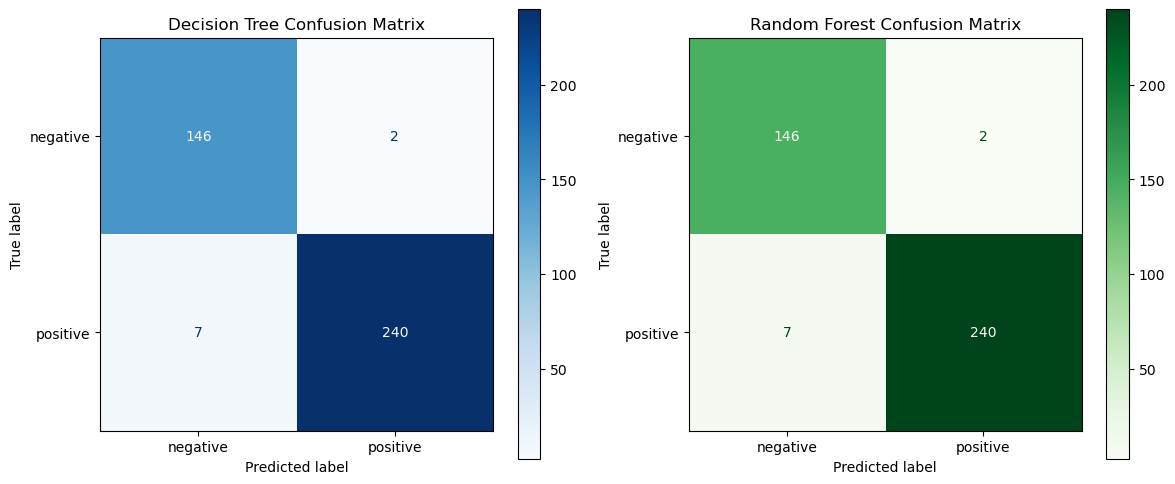

In [61]:
#Plotting the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtree, ax=ax[0], cmap='Blues')
ax[0].set_title('Decision Tree Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, ax=ax[1], cmap='Greens')
ax[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


As it can be seen, out of 395 test cases, our models can guess 386 of them correctly. Out of 9 misses, 7 of them are cases that are positive but the models guessed as negative while 2 of them are cases that are negative but the models labeled as positive.

Another interesting thing is that although we expected to see the accuracy of random forest classifier higher than decision tree, they ended up being the same. Our first guess for the reason is that one or two features overweigh other features, resulting in dominant and easier predictions. To test this, we plot the importances of each feature in both models.

In [62]:
def plot_feature_importances(model, features, title):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.title(title)
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


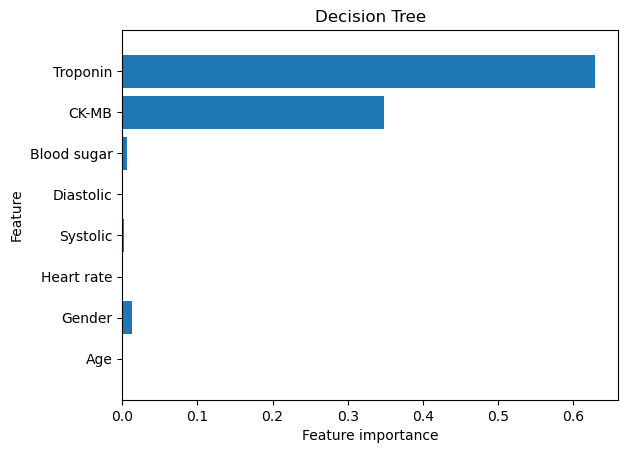

In [63]:
# To see the degree of importance of the features for a decision tree
plot_feature_importances(dtree, feature_cols, 'Decision Tree')

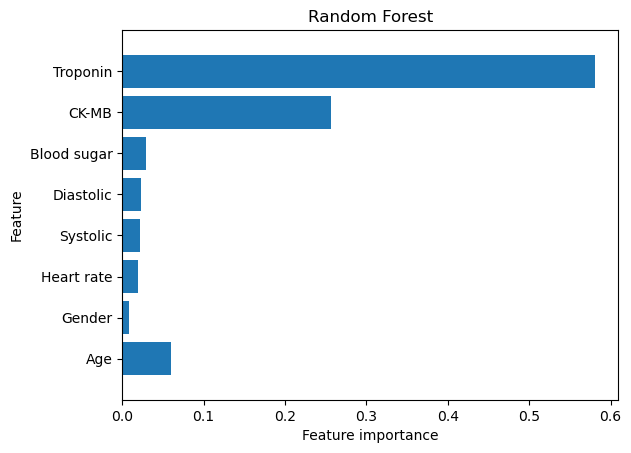

In [64]:
# To see the degree of importance of the features for a decision tree
plot_feature_importances(forest, feature_cols, 'Random Forest')


Two graphs above show that Troponin and CK-MB are clear indicators of heart attack result and other features do not give many information about if the patient is positive or negative in result. We already found out in the EDA section that Troponin and CK-MB is relatively high when the patient is positive and it was not hard to indicate. Therefore, a simple decision tree as a classifier is enough for our purpose to identify if a patient is positive, and we do not need to use random forest classifier and increase complexity.

Although both of our models give the same result, we will check their recall and precision graphs together below.

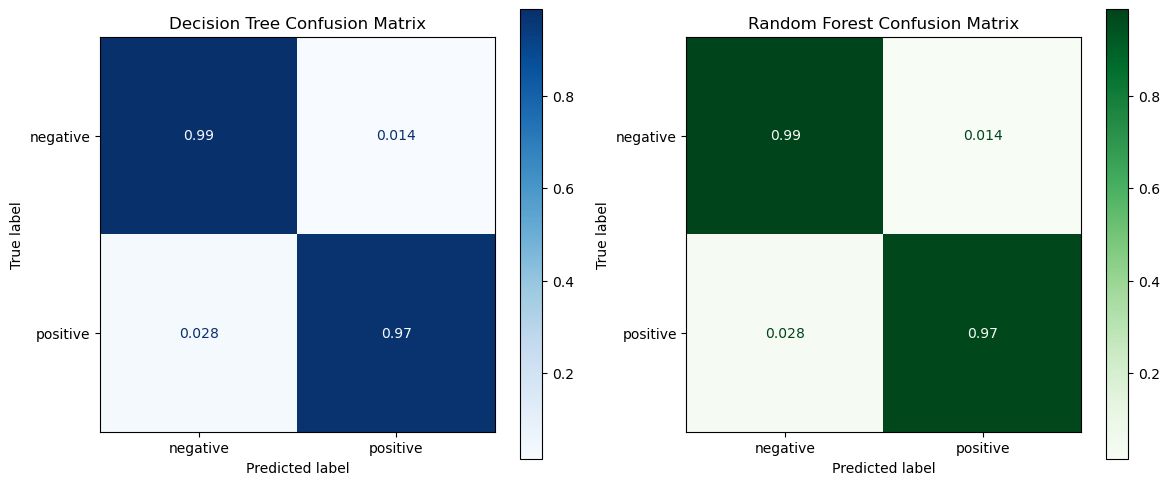

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtree, ax=ax[0], cmap='Blues', normalize='true')
ax[0].set_title('Decision Tree Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, ax=ax[1], cmap='Greens', normalize='true')
ax[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()

The diagonals on the graphs above display the recall of each class labels. While the recall of negative heart attack is 0.99, the recall of positive heart attack is 0.97.

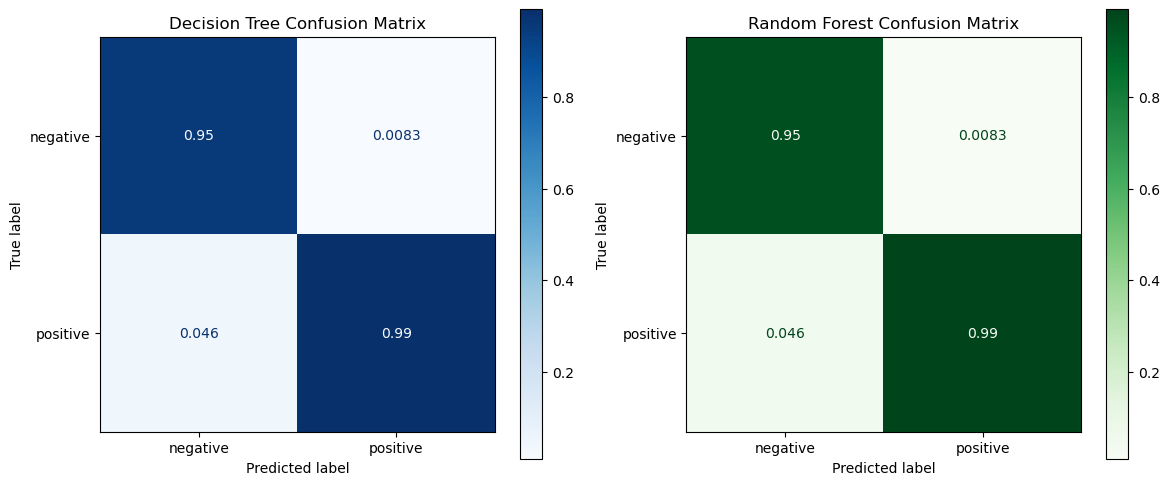

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dtree, ax=ax[0], cmap='Blues', normalize='pred')
ax[0].set_title('Decision Tree Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_forest, ax=ax[1], cmap='Greens', normalize='pred')
ax[1].set_title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


[Text(0.6538461538461539, 0.9166666666666666, 'x[7] <= 0.015\ngini = 0.476\nsamples = 921\nvalue = [360, 561]'),
 Text(0.5769230769230769, 0.75, 'x[6] <= 6.285\ngini = 0.351\nsamples = 466\nvalue = [360, 106]'),
 Text(0.38461538461538464, 0.5833333333333334, 'x[6] <= 4.955\ngini = 0.038\nsamples = 366\nvalue = [359, 7]'),
 Text(0.23076923076923078, 0.4166666666666667, 'x[6] <= 0.68\ngini = 0.006\nsamples = 342\nvalue = [341, 1]'),
 Text(0.15384615384615385, 0.25, 'x[6] <= 0.675\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.23076923076923078, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.25, 'gini = 0.0\nsamples = 325\nvalue = [325, 0]'),
 Text(0.5384615384615384, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(0.46153846153846156, 0.25, 'x[5] <= 98.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Te

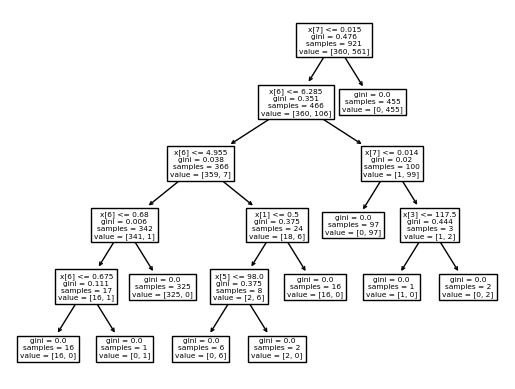

In [66]:
# Exporting the tree into a .dot file

export_graphviz(dtree, out_file='Medicaldataset.dot', 
                #class_names=True, 
                class_names= data.Result.unique(), 
                feature_names=feature_cols,
                impurity=False,
                filled=True)
        



tree.plot_tree(dtree)

## 4.1. Clustering
The process of grouping unlabeled data or data points into distinct clusters so that similar data points are grouped together rather than separately from one another is known as clustering

### 4.3.1 Feature Selection for Clustering
Firstly, we need to select features that we are interested in. In that model, we want to see whether people can be grouped according to their heart rate and blood sugar values. In order to see whether these two attributes are proper for clustering and, if they are, which clustering method is the best to apply, we need to plot a graph of these attributes.

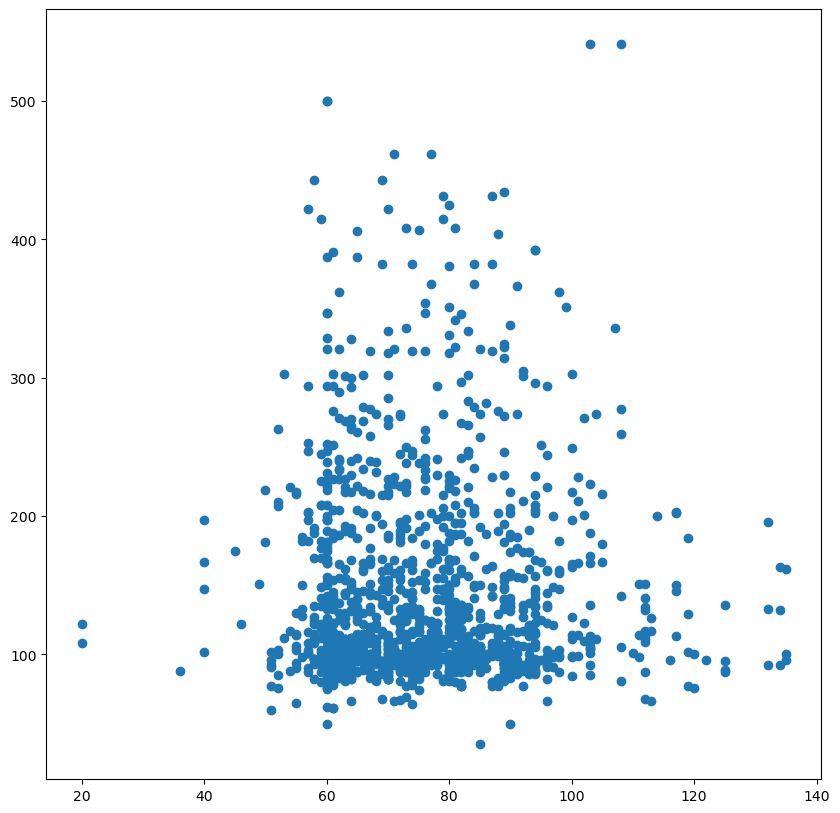

In [71]:
plt.figure(figsize=(10, 10))

plt.scatter(data["Heart rate"], data["Blood sugar"])

We can apply Partitional approach for clustering. To see if we need data scaling we have to apply clustering and visualize it.

### 4.3.2 Model Construction and Validation for Clustering
We apply to model and build it. You can result of the clustering and the array stored labeled data for each data points. Additionally, center points of clusters are specified below.

In [74]:
from sklearn.cluster import KMeans

target = data[["Heart rate", "Blood sugar"]]
kmeans = KMeans(n_clusters=3)
kmeans.fit(target)

C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [75]:
kmeans.labels_

array([1, 2, 1, ..., 0, 2, 0])

In [76]:
len(kmeans.labels_)

1316

In [77]:
kmeans.cluster_centers_

array([[ 75.89710611, 107.92818864],
       [ 76.17508418, 207.06632997],
       [ 76.24418605, 359.13953488]])

### 4.3.3 Model Application and Performance Evaluation for Clustering
Now, we can look at the visualized result of the clustering we applied and optimize it more.

In [79]:
import mglearn
import matplotlib.pyplot as plt

list_clusters = range(0, 3)

plt.figure(figsize=(12, 12))

mglearn.discrete_scatter(target['Heart rate'], target['Blood sugar'], kmeans.labels_, markers='o')

mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Heart rate')
plt.ylabel('Blood sugar')

ModuleNotFoundError: No module named 'mglearn'

### 4.3.3.1 Improving the Model by Data Scaling
Due to the fact that blood sugar features are dominant compared to heart rate, clustering points are assigned according to only blood sugar attributes. That is why we need to apply data scaling.

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaledHeartRate = pd.DataFrame(scaler.fit_transform(target), columns=target.columns)


We need to build the model again with scaled values.

In [82]:
scaledKmeans = KMeans(n_clusters=3)
scaledKmeans.fit(scaledHeartRate)

C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

Visualization of the result scaled data is below.

In [83]:
list_clusters = range(0, 3)

plt.figure(figsize=(12, 12))

mglearn.discrete_scatter(scaledHeartRate["Heart rate"], scaledHeartRate["Blood sugar"], scaledKmeans.labels_, markers='o')

mglearn.discrete_scatter(scaledKmeans.cluster_centers_[:, 0], 
                         scaledKmeans.cluster_centers_[:, 1], 
                         list_clusters, markers='D', 
                         markeredgewidth=10)

plt.xlabel('Heart rate')
plt.ylabel('Blood sugar')

NameError: name 'mglearn' is not defined

<Figure size 1200x1200 with 0 Axes>

### 4.3.3.2 Elbow Method
To increase the correctness of our model, we can find a better k-value, which indicates the number of clusters. We can apply the Elbow Method for finding optimal values.

C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

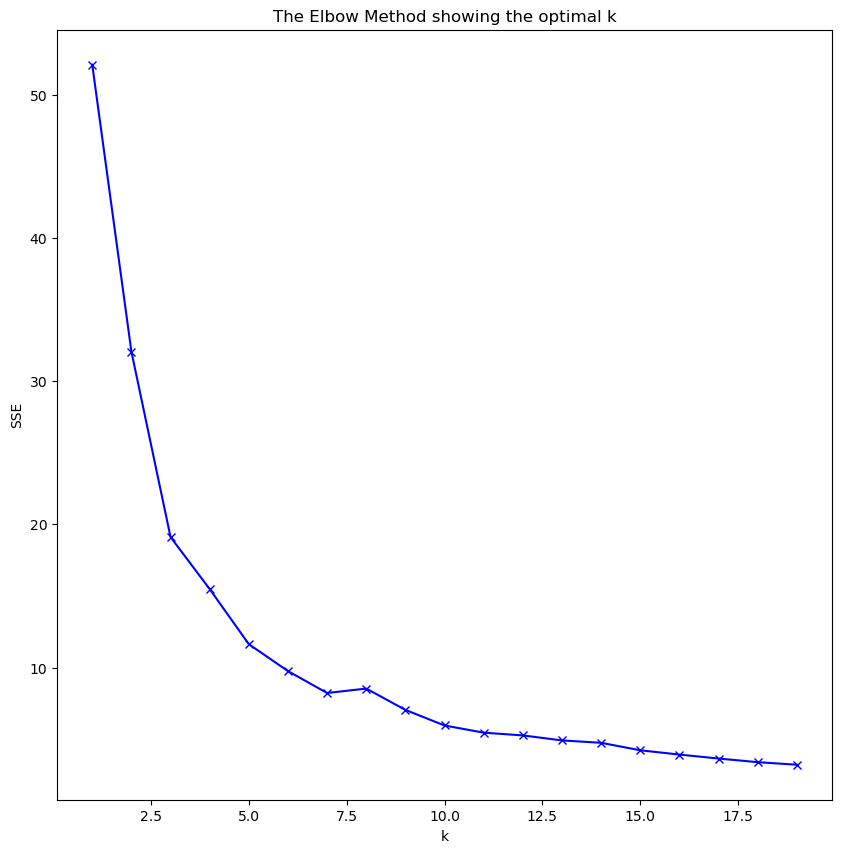

In [84]:
errors = []
kList = range(1, 20)
for k in kList:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaledHeartRate)
    errors.append(kmeanModel.inertia_)

plt.figure(figsize=(10, 10))
plt.plot(kList, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [85]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 20.02448160340895
K=3: 12.947934550363861
K=4: 3.631345014680903
K=5: 3.845245535308587
K=6: 1.8797686777404277
K=7: 1.5286051286464115
K=8: -0.3086804859616237
K=9: 1.4886916219918627
K=10: 1.088722335679087
K=11: 0.500712027509902
K=12: 0.19216294302131853
K=13: 0.3483031208161691
K=14: 0.16714956167421402
K=15: 0.5223585464844174
K=16: 0.2998442107194057
K=17: 0.27588195888421385
K=18: 0.2538604920128207
K=19: 0.17796531976223529


Looking at the graph and data above, we can try 4,5,6 and 7 for K values to get a better clustering result.

### 4.3.3.3 Dendrogram
We can also find best cluster number by looking at the dendogram.

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Heart Rate - Blood Sugar Dendogram")
dend = shc.dendrogram(shc.linkage(scaledHeartRate, method='ward'))

plt.axhline(y=150, color='r', linestyle='--')

Also, dendrogram states that the best value of K is between 4 and 7.

### 4.3.4 Visualize and Analyze for Clustering
Now we can appy the optimal K values we found by elbow and dendrogram method.

In [87]:
for i in range(4,8):
    scaledKmeans = KMeans(n_clusters=i)
    scaledKmeans.fit(scaledHeartRate)

    plt.figure(figsize=(6, 6))

    mglearn.discrete_scatter(scaledHeartRate["Heart rate"], scaledHeartRate["Blood sugar"], scaledKmeans.labels_, markers='o')

    plt.title("Agglomerative clustering with {0} clusters".format(i))
    plt.xlabel('Heart rate')
    plt.ylabel('Blood sugar')

C:\Users\Best Surface\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


NameError: name 'mglearn' is not defined

<Figure size 600x600 with 0 Axes>

As a result, we could get a decent clustering sample from this dataset. Even though we needed to apply data scaling for better results and visualization, our model did not generally fail. We applied elbow and dendrogram methods to find more optimal K values to get better results. According to our result, values 4,5,6 and 7 are the best. Visualized results can be seen above.

## 5. Conclusion and Discussion


* In our project, we aimed to predict the occurence of heart attack, and to do that we explored our data that revealed that certain parameters such as CK-MB and Troponin lvels are higher in patients who have experiences a heart attack, which guided us in building our predictive models. We used  classification techniques both decision tree and random forest to predict heart attack occurences with a high accurency. We also used simple and multiple linear regressions to predict blood pressure levels. For clustering, we provided insights into how patients couldl be grouped based on both their heart rate and blood sugar levels; which therefore could be used to esily identify the patients of high risk of occurence of heart attack
* Some of the challenges that we encountered during this project was to come up with what do we want to do with our dataset and which techniques to use.
* Enhancing model accuracy by exploring more sophisticated algorithms or also incorporating a larger sample size with more parameters could enhance the effectivenes of our models
